# HW 1: Perceptron

Note: you can add text written in Markdown to this notebook to explain your work and your conclusions. In local Jupyter, add a new cell by using the "+" button on the toolbar), and set it to be a markdown cell (by toggling the "Code" dropdown on the toolbar to say "Markdown" instead). In Colab, use the +Text button on the toolbar.

For examples of how to use Markdown, look at the examples in this notebook, or [this cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

In [1]:
import random
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
random.seed(3)

## Generate Data

In [7]:
n = 50
d = 2
feature_dict = {'feature 1': randn(n),
                'feature 2': randn(n),
                'offset':    np.ones(n)}
X = pd.DataFrame(data=feature_dict)
w_true = pd.Series(randn(d+1), index=X.columns)
y = np.sign(X.dot(w_true))

## Visualize Data

In [8]:
def plot_perceptron(X,y,w,plot_classification_boundary=True):
    for index, row in X.iterrows():
        if y[index] > 0:
            plt.scatter(row[0],row[1],color='blue',marker='s',label="y=1")
        else: 
            plt.scatter(row[0],row[1],color='red',marker='o',label="y=-1")

    plt.xlim(-2,2)
    plt.ylim(-2,2)

    if plot_classification_boundary:
        x1samples = np.arange(np.min(X['feature 1']),np.max(X['feature 1']),0.1)
        plt.plot(x1samples, [-(w[0]*x1 + w[2])/w[1] for x1 in x1samples],color='black',label='classification boundary')
    plt.show()

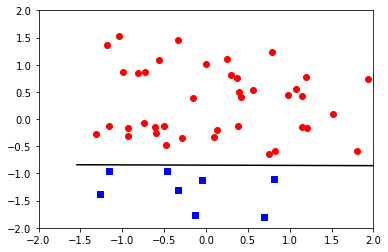

In [9]:
plot_perceptron(X,y,w_true)

## a) Code the missing parts of the Perceptron algorithm

Inputs to Perceptron are:

required arguments: <br>
X = data points <br>
Y = true values <br>

optional arguments: <br>
maxchecks = maximum number of data points to look out, which may or may not violate the perceptron condition (default: 1000) <br>
maxiters = maximum number of updates to w (default: 100) <br>
w_0 = initial guess of w (default: random) <br>

Perceptron should start with the input guess of w, look at most maxiters data points and make at most maxsteps updates, and return the final w.

In [7]:
### STUDENT
# Python does not allow the argument of a function to depend on another argument, 
# so we bypass the issue by setting w = None and assigning it immediately in the function
def perceptron(X=X,y=y,w_0=None,maxchecks=1000,maxiters=100): 
    if w_0 is None:
        w_0=randn(X.shape[1])
    ### ENTER YOUR CODE HERE
    
    return w

In [10]:
### SOLUTION
def perceptron(X=X,y=y,w_0=None,maxchecks=1000,maxiters=100,plot_progress=False):
    if w_0 is None:
        w_0 = randn(X.shape[1])
    w = [x for x in w_0] # Make a copy of the intialized weight, since the weight vector is mutable
    n = len(y)
    step = 0
    laststep = 0
    for i in range(0,maxchecks):
            if np.dot(y[i%n] * X.iloc[i%n], w) < 0: # Loop over the data points until we find one that violates perceptron condition
                step += 1
                laststep = i
                w += y[i%n] * X.iloc[i%n]
                if plot_progress and step%5==0:
                    plot_perceptron(X,y,w)
            if i - laststep > n or step > maxiters: # No more violations or number of steps exceed maxiters limit
                if plot_progress:
                    plot_perceptron(X,y,w)
                break
    return w

In [9]:
w_true

feature 1    0.030290
feature 2   -0.695319
offset       0.542816
dtype: float64

In [13]:
perceptron(X,y)

feature 1   -0.061186
feature 2   -2.512734
offset       2.202150
Name: 0, dtype: float64

In [15]:
### Alternative solution to coding perceptron learning algorithm; does not use maxchecks argument
def perceptron_alt(X=X,y=y,w_0=None,maxiters=100,plot_progress=False):
    if w_0 is None:
        w_0 = randn(X.shape[1])
    w = [x for x in w_0] # Make a copy of the intialized weight, since the weight vector is mutable
    n = len(y)
    steps = 0
    i = 0
    while steps < maxiters: # Run while number of steps does not exceed limit set by maxiters
        if np.dot(y[i] * X.iloc[i], w) < 0: # Loop over the data points until we find one that violates perceptron condition
                w += y[i] * X.iloc[i]
                steps += 1
                i = 0
                if plot_progress and step%5==0:
                    plot_perceptron(X,y,w)
        else: 
            i += 1
        if i == n: # If no point is violated, break the for loop early
            break 
    return w

## b) Run perceptron on the above linearly separable data set

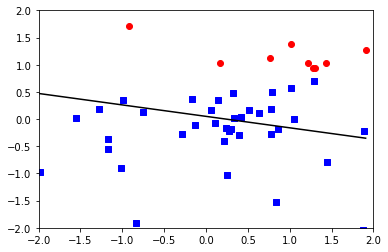

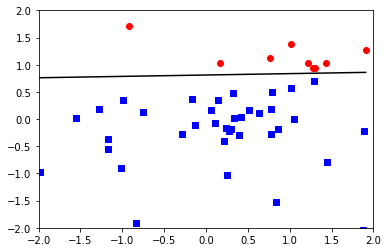

In [16]:
w = perceptron(X,y,plot_progress=True)

## c) Run perceptron on data sets of size n = 20, 100, and 1000

In [11]:
def generate_data(n=50,d=2):
    feature_dict = {}
    for i in range(d):
        feature_dict['feature ' + str(i+1)] = randn(n)
    feature_dict['offset'] = np.ones(n)
    X = pd.DataFrame(data=feature_dict)
    w_true = pd.Series(randn(d+1), index=X.columns)
    y = np.sign(X.dot(w_true))
    return X,y,w_true

In [18]:
# Generate data sets of size n=20,100,1000 with dimension 2
X_20,y_20,w_20_true = generate_data(n=20,d=2)
X_100,y_100,w_100_true = generate_data(n=100,d=2)
X_1000,y_1000,w_1000_true = generate_data(n=1000,d=2)

In [19]:
# Run perceptron on above data sets
w_20 = perceptron(X_20,y_20)
w_100 = perceptron(X_100,y_100)
w_1000 = perceptron(X_1000,y_1000)

## d) Run perceptron on data set of size n=1000 with dimension d=10

In [12]:
X_large,y_large,w_large_true = generate_data(n=1000,d=10)

In [13]:
w_large = perceptron(X_large, y_large)

## e) Run perceptron on dataset from (d) 100 times

Plot a histogram for the number of updates that the algorithm takes to converge.
By convergence, we mean the distance between the normalized weight vectors is smaller than some small $\epsilon>0$. For purposes of this problem, choose $\epsilon = 0.1$.

For this portion, make sure your perceptron implementation picks the next consideration point randomly instead of deterministically.

In [22]:
### STUDENT
# Create a helper function that computes the euclidean distance between normalized versions of vectors x,y
def distance(x,y):
    ### ENTER YOUR CODE HERE
    return 

In [23]:
### STUDENT 
def perceptron_e(X=X,y=y,w_0=None,epsilon=0.1,w_true=w_true):
    if w_0 is None:
        w_0 = randn(X.shape[1])
    ### ENTER YOUR CODE HERE
    return w, steps

In [14]:
### SOLUTION
def distance(x,y): # Distance between normalized versions of vectors x,y
    normalized_x = x / np.sqrt(np.sum(x**2))
    normalized_y = y / np.sqrt(np.sum(y**2))
    return np.sqrt(np.sum((normalized_x-normalized_y)**2))

In [15]:
### SOLUTION
def perceptron_e(X=X,y=y,w_0=None,epsilon=0.1,w_true=w_true):
    if w_0 is None:
        w_0 = randn(X.shape[1])
    w = [x for x in w_0]
    n = len(y)
    error = 1
    steps = 0
    while error > epsilon: # Run until convergence
        i = np.random.randint(0,n) # Choose next point randomly instead of deterministically
        if np.dot(y[i] * X.iloc[i], w) < 0: # Loop over the data points until we find one that violates perceptron condition
                w += y[i] * X.iloc[i]
                steps += 1
                error = distance(w,w_true)
    return w, steps

In [16]:
all_steps = []
for i in range(0,100):
    if i%5==0:
        print('Working on iteration ' + str(i))
    w,steps = perceptron_e(X=X_large,y=y_large,w_true=w_large_true)
    all_steps.append(steps)

Working on iteration 0
Working on iteration 5
Working on iteration 10
Working on iteration 15
Working on iteration 20
Working on iteration 25
Working on iteration 30
Working on iteration 35
Working on iteration 40
Working on iteration 45
Working on iteration 50
Working on iteration 55
Working on iteration 60
Working on iteration 65
Working on iteration 70
Working on iteration 75
Working on iteration 80
Working on iteration 85
Working on iteration 90
Working on iteration 95


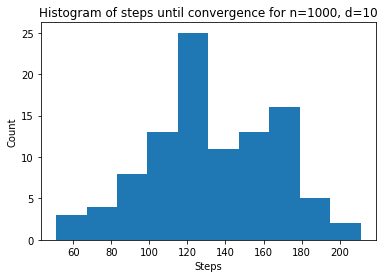

In [22]:
plt.title("Histogram of steps until convergence for n=1000, d=10")
plt.xlabel("Steps")
plt.ylabel("Count")
plt.hist(all_steps)
plt.show()

## f) Summarize your conclusions with respect to accuracy and running time as a function of n (size of data set) and d (dimension).¶

For this part, assume the data is not linearly separable and given a 1-2 sentence qualitative response for all 4 cases (accuracy/running time vs $n$/$d$). (If your perceptron always converges, then the accuracy will be perfect; if you stop before convergence, eg because it's taking too long to run, your accuracy will be less than perfect.)

**RESPONSE:** (i) accuracy decreases as the size of the data set increases (in the sense that the algorithm has more trouble honing down the most optimal classificaiton boundary)

(ii) accuracy decreases as the dimension of the data set increases (in the sense that the algorithm needs to search more dimensions in hope of finding a linearly separable classifier)

(iii) running time increases as the size of the data set increases

(iv) running time increases as the dimension of the data set increases


## g) Run the perceptron from part (a) on the dataset with an outlier given below. What happens?

In [26]:
# (re)generate data with same random seed, adding one outlier
random.seed(3)
X,y,w = generate_data(n=50, d=2)
y[0] = -y[0]

In [27]:
w_init = randn(d+1)
distance(w,perceptron(X,y,w_init))

0.205373796195298

**ANSWER**: The weight vector computed by perceptron does not converge to the true weight vector since the data is no longer linearly separable.

## h) Try out one idea to fix perceptron

In [28]:
### SOLUTION
# Consider the 'pocket' algorithm which keeps the best weight vector of the perceptron learning algorithm
# This algorithm is much slower due to having to having to compute the in-error rate at each update step
# See pg. 80 in 'Learning From Data' by Abu-Mostafa et al.
def pocket(X=X,y=y,w_0=None,maxchecks=1000,maxiters=100,plot_progress=False):
    if w_0 is None:
        w_0 = randn(X.shape[1])
    w = [x for x in w_0]
    n = len(y)
    error_best = n
    w_best = w
    step = 0
    laststep = 0
    
    for i in range(0,maxchecks):
            if np.dot(y[i%n] * X.iloc[i%n], w) < 0: # Loop over the data points until we find one that violates perceptron condition
                w += y[i%n] * X.iloc[i%n]
                
                error = 0 # Compute error of using updated weight vector w
                for index, row in X.iterrows(): 
                    if np.sign(np.dot(row,w)) != y[index]:  
                        error += 1 
                        
                if error < error_best:
                    error_best = error
                    w_best = w
                    
                step += 1
                laststep = i
                
                if plot_progress and step%5==0:
                    plot_perceptron(X,y,w)
                    
            if i - laststep > n or step > maxiters: # No more violations or number of steps exceed maxstep limit
                if plot_progress:
                    plot_perceptron(X,y,w)
                break
    return w

In [29]:
distance(w,pocket(X,y,w_init))
# Should be no greater than distance from part (f) since we intialized with the same weight vector, and we are looping sequentially through the dataset (no randomness in selection)
# Likely to be the same if the number of iters / steps is not sufficiently large.

0.205373796195298